# Predicting Credit Card Approvals

## Overview

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like:
* high loan balances
* low income levels
* or too many inquiries on an individual's credit report

Manually analyzing these applications is mundane, error-prone, and time-consuming. So we should apply Data Analytics into this to help building an automatic credit card approval predictor using Data Analytics techniques to solve the problems.

The Dataset:
* Name: Credit Card Approval
* Source: UCI Machine Learning Repository
* Link: http://archive.ics.uci.edu/ml/datasets/credit+approval

Approach:
* Loading and viewing the dataset to summarize some statistics information
* Data Wrangling (if needed)
* Exploratory data analysis
* Build a model that can predict if an individual's application for a credit card will be accpeted
* Implement the analytics model to make right predictions

## Loading and viewing the dataset

In [424]:
import pandas as pd
main_data = pd.read_csv("crx.data", header=None)

main_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Data frame info

In [425]:
data_info = main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [426]:
main_data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

## Inspecting the data

The table returned a bit consufing because of the columns don't have its name, instead of numbers. But with the usual knowledge, we know some features of a credit card application should like: (0) `Gender`, (1) `Age`, (2) `Debt`, (3) `Married`, (4) `BankCustomer`, (5) `EducationLevel`, (6) `Ethnicity`, (7) `YearsEmployed`, (8) `PriorDefault`, (9) `Employed`, (10) `CreditScore`, (11) `DriversLicense`, (12) `Citizen`, (13) `ZipCode`, (14) `Income`, and (15) `ApprovalStatus` ([ref link](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html)).

So what we're trying to do here is "mapping" these features to the columns.

**Data at first look**

The dataset has a mixture of numerical and non-numerical features. Some features we can guess like column (2) seems about Age and column (1) maybe is about Gender.

Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.

The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000

## Summary statistics

In [427]:
summary_stats = main_data.describe()
print(summary_stats)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


Data has a total of 690 entries that means credit card applications with a total of 16 columns including 15 feature variables and one output variable.

## Inspect if there are missing values

In [428]:
main_data.tail(25)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
665,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,00000,0,-
666,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,00180,0,-
667,a,17.92,0.540,u,g,c,v,1.750,f,t,1,t,g,00080,5,-
668,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,00252,0,-
669,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,00120,1,-
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-


In [429]:
main_data.sample(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
264,b,50.75,0.585,u,g,ff,ff,0.000,f,f,0,f,g,00145,0,-
56,b,23.17,0.000,u,g,cc,v,0.085,t,f,0,f,g,00000,0,+
44,b,56.42,28.000,y,p,c,v,28.500,t,t,40,f,g,00000,15,+
195,b,28.25,5.040,y,p,c,bb,1.500,t,t,8,t,g,00144,7,+
663,b,32.08,4.000,y,p,cc,v,1.500,f,f,0,t,g,00120,0,-
91,b,31.42,15.500,u,g,c,v,0.500,t,f,0,f,g,00120,0,-
344,b,38.92,1.750,u,g,k,v,0.500,f,f,0,t,g,00300,2,-
355,a,16.00,0.165,u,g,aa,v,1.000,f,t,2,t,g,00320,1,-
137,b,33.58,2.750,u,g,m,v,4.250,t,t,6,f,g,00204,0,+
370,b,33.00,2.500,y,p,w,v,7.000,f,f,0,t,g,00280,0,-


## Create copied data

Avoiding to interact with the original data, we need to create a duplicate source to work with.

In [430]:
copied_data = main_data.copy()
copied_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Handling the missing values (1)

The missing values in the dataset are labeled with '?'. We will find that by the code belows:

In [431]:
count = 0
for column in copied_data.columns:
    for value in copied_data[column]:
        if value == "?":
            count += 1

print(count)

67


So, there were 67 missing values in our dataset. In this case, We've just check if there randomly have "?". 

We can temporarily replace these missing value question marks with NaN to use the Numpy later to clean up the data.

In [432]:
import numpy as np
# Replace the '?'s with NaN in the train and test sets
copied_data = copied_data.replace("?",np.nan)

In [433]:
copied_data.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


We're going to impute the missing values with mean (mean imputation) in column 2, 7, 10 and 14. Because of the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.

In [434]:
# Impute the missing values with mean imputation
copied_data.fillna(value={2:copied_data[2].mean(), 7:copied_data[7].mean(), 10:copied_data[10].mean(), 14:copied_data[14].mean()}, inplace=True)

In [435]:
# Count the number of NaNs in the dataset and print the counts to verify
counts_in_data = copied_data.isna().sum()
print(counts_in_data)

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


## Handling the missing values (2)

We can see feature 2, 7, 10, and 14 don't have any left NaN value.

But as the same time, we can see that there are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13.

So, I will impute these missing values with the most frequent values in the respective columns.

[Ref link](https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/)

In [436]:
# Iterate over each column of copied_data
for col in copied_data.columns:
    # Check if the column is of object type
    if copied_data[col].dtype == 'object':
        # Impute with the most frequent value
        copied_data[col] = copied_data[col].fillna(copied_data[col].value_counts().keys()[0])

In [437]:
copied_data.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,b,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [438]:
# Count the number of NaNs in the dataset and print the counts to verify
check_info = copied_data.isna().sum()
print(check_info)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


The missing values are now successfully handled!

## Preprocessing the data (1)

Review the dataset:

In [439]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


As we can see, the column (1) shows its number (float64) but in the info, it's shown as "object", so we need to "convert" it into numeric.

the column (0) as I mentioned from the beginning, is "Gender", we can see it male and female and they can be convert into numeric like (if) male is 1 (if not is 0, like `True` or `False`)

I do that for easier calculating later.

"Scikit Learn" library has a module called "LabelEncoder" which helps to label character labels into numbers so first import module "LabelEncoder".

[ref link](https://thatascience.com/learn-machine-learning/label-encoding/)

In [440]:
copied_data.sample(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
617,b,32.25,14.000,y,p,ff,ff,0.000,f,t,2,f,g,00160,1,-
509,b,21.00,4.790,y,p,w,v,2.250,t,t,1,t,g,00080,300,+
130,b,67.75,5.500,u,g,e,z,13.000,t,t,1,t,g,00000,0,+
497,b,20.17,9.250,u,g,c,v,1.665,t,t,3,t,g,00040,28,+
517,b,16.08,0.750,u,g,c,v,1.750,t,t,5,t,g,00352,690,+
589,b,25.33,0.580,u,g,c,v,0.290,t,t,7,t,g,00096,5124,+
549,b,48.33,12.000,u,g,m,v,16.000,t,f,0,f,s,00110,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
401,b,28.92,0.375,u,g,c,v,0.290,f,f,0,f,g,00220,140,-
132,a,47.42,8.000,u,g,e,bb,6.500,t,t,6,f,g,00375,51100,+


In [441]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

# a: 0; b: 1
copied_data.iloc[:,[0]] = number.fit_transform(copied_data[0].astype(str))

# Following the method, the negative sign (-) will be converted into 1; and the positive sign (+) => 0
copied_data[15] = number.fit_transform(copied_data[15].astype(str));

/var/folders/3k/tcnw6tln063258ybjmqs27bc0000gn/T/ipykernel_31800/3350339960.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  copied_data.iloc[:,[0]] = number.fit_transform(copied_data[0].astype(str))


In [442]:
copied_data.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,0
1,0,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,0
2,0,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,0
3,1,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,0
4,1,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,0
5,1,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,0
6,1,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,0
7,0,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,0
8,1,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,0
9,1,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,0


Next, we can use the ordinal encoding method to transform the categorical feature variables into numeric in columns 3, 4, 5, 6, 8,9 and 12

Ref: [Ordinal Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

In [443]:
from sklearn.preprocessing import OrdinalEncoder

# Columns list to transform
cols_list = [3,4,5,6,8,9,12]

# ordinal-encode categorical columns
ordinal_encoder = OrdinalEncoder()

copied_data[cols_list] = ordinal_encoder.fit_transform(copied_data[cols_list])

In [444]:
# Preview the ordinal-encoded features
copied_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,1.0,0.0,12.0,7.0,1.250,1.0,1.0,1,f,0.0,00202,0,0
1,0,58.67,4.460,1.0,0.0,10.0,3.0,3.040,1.0,1.0,6,f,0.0,00043,560,0
2,0,24.50,0.500,1.0,0.0,10.0,3.0,1.500,1.0,0.0,0,f,0.0,00280,824,0
3,1,27.83,1.540,1.0,0.0,12.0,7.0,3.750,1.0,1.0,5,t,0.0,00100,3,0
4,1,20.17,5.625,1.0,0.0,12.0,7.0,1.710,1.0,0.0,0,f,2.0,00120,0,0
5,1,32.08,4.000,1.0,0.0,9.0,7.0,2.500,1.0,0.0,0,t,0.0,00360,0,0
6,1,33.17,1.040,1.0,0.0,11.0,3.0,6.500,1.0,0.0,0,t,0.0,00164,31285,0
7,0,22.92,11.585,1.0,0.0,2.0,7.0,0.040,1.0,0.0,0,f,0.0,00080,1349,0
8,1,54.42,0.500,2.0,2.0,8.0,3.0,3.960,1.0,0.0,0,f,0.0,00180,314,0
9,1,42.50,4.915,2.0,2.0,12.0,7.0,3.165,1.0,0.0,0,t,0.0,00052,1442,0


## Preprocessing the data (2)

As we knew, the columns are: (0) `Gender`, (1) `Age`, (2) `Debt`, (3) `Married`, (4) `BankCustomer`, (5) `EducationLevel`, (6) `Ethnicity`, (7) `YearsEmployed`, (8) `PriorDefault`, (9) `Employed`, (10) `CreditScore`, (11) `DriversLicense`, (12) `Citizen`, (13) `ZipCode`, (14) `Income`, and (15) `ApprovalStatus` ([ref link](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html)).

I will rename the features to convenient observation

Notes: The `Driverlicense` (column 11) and the `ZipCode` (cl 13) are not needed for the analysis, so they should be removed

In [445]:
# Drop the features 11 and 13
copied_data = copied_data.drop(columns=[11,13])
copied_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,12,14,15
0,1,30.83,0.000,1.0,0.0,12.0,7.0,1.250,1.0,1.0,1,0.0,0,0
1,0,58.67,4.460,1.0,0.0,10.0,3.0,3.040,1.0,1.0,6,0.0,560,0
2,0,24.50,0.500,1.0,0.0,10.0,3.0,1.500,1.0,0.0,0,0.0,824,0
3,1,27.83,1.540,1.0,0.0,12.0,7.0,3.750,1.0,1.0,5,0.0,3,0
4,1,20.17,5.625,1.0,0.0,12.0,7.0,1.710,1.0,0.0,0,2.0,0,0
5,1,32.08,4.000,1.0,0.0,9.0,7.0,2.500,1.0,0.0,0,0.0,0,0
6,1,33.17,1.040,1.0,0.0,11.0,3.0,6.500,1.0,0.0,0,0.0,31285,0
7,0,22.92,11.585,1.0,0.0,2.0,7.0,0.040,1.0,0.0,0,0.0,1349,0
8,1,54.42,0.500,2.0,2.0,8.0,3.0,3.960,1.0,0.0,0,0.0,314,0
9,1,42.50,4.915,2.0,2.0,12.0,7.0,3.165,1.0,0.0,0,0.0,1442,0


In [446]:
copied_data = copied_data.rename(columns={0: 'Gender', 1: 'Age', 2: 'Debt', 3: 'Married', 4: 'BankCustomer', 5: 'EducationLevel', 6: 'Ethnicity', 7: 'YearsEmployed', 8: 'PriorDefault', 9: 'Employed', 10: 'CreditScore', 12: 'Citizen', 14: 'Income', 15: 'ApprovalStatus'     })

copied_data.head()


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,1,30.83,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0,0
1,0,58.67,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,560,0
2,0,24.50,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,824,0
3,1,27.83,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,0.0,3,0
4,1,20.17,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,2.0,0,0


## Fresh visualization

Let’s visualize the target variable and have a look at how many approved and declined applications are there in our dataset (can do this with train and test sets)



In [447]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Approval proportion**

In [448]:
copied_data['ApprovalStatus'].value_counts()

1    383
0    307
Name: ApprovalStatus, dtype: int64

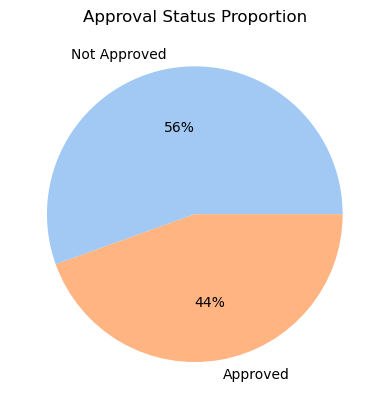

In [449]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
labels = ['Not Approved', "Approved"]

#create pie chart
plt.pie(copied_data['ApprovalStatus'].value_counts(),labels=labels, colors = colors, autopct='%.0f%%')
plt.title("Approval Status Proportion")
plt.show()

According to UCI's explanation (http://archive.ics.uci.edu/ml/datasets/credit+approval) 

The dataset contains more instances that correspond to "Not Approved (Denied)" status than instances corresponding to "Approved" status. Specifically, out of 690 instances , there are 383 (56%) applications that got denied and 307 (44%) applications that got approved.

## Fitting a logistic regression model to the train set

Essentially, predicting if a credit card application will be approved or not is a classification task ([ref link](https://www.wikiwand.com/en/Statistical_classification))

So, what we're trying to do here is develop a model should be able to accurately predict the status of the applications with respect to these statistics.

**Question**: Are the features that affect the credit card approval decision process correlated with each other? 

Because of this correlation, I'll take advantage of the fact that generalized linear models perform well in these cases. 

This tells us that our dataset has an equal representation of both the outcomes of our binary classifier.

First, we need to split the dataset into pieces for implementation later

## Splitting the dataset into train and test sets

The dataset will split into train set and test set to prepare our data for two different phases of modeling: training and testing

In [454]:
# Separate target from features
features = copied_data.drop(['ApprovalStatus'], axis=1)
X = features.copy()
y = copied_data['ApprovalStatus']
# Preview features
X.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income
0,1,30.83,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0
1,0,58.67,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,560
2,0,24.50,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,824
3,1,27.83,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,0.0,3
4,1,20.17,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,2.0,0


We split the feature (X) and target (y) dataframes into a training set (70%) and testing set (30%). Training set is used for building classification model and testing set is used for evaluating the performance of the model.

In [455]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [456]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30,
                                               random_state=2)

In [459]:
xTrain.head(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income
52,1,37.42,2.040,1.0,0.0,12.0,7.0,0.040,1.0,0.0,0,0.0,5800
655,0,21.08,5.000,2.0,2.0,5.0,2.0,0.000,0.0,0.0,0,0.0,0
577,1,25.17,6.000,1.0,0.0,1.0,7.0,1.000,1.0,1.0,3,0.0,0
178,0,18.42,9.250,1.0,0.0,10.0,7.0,1.210,1.0,1.0,4,0.0,540
558,1,51.42,0.040,1.0,0.0,13.0,3.0,0.040,1.0,0.0,0,0.0,3000
117,1,52.50,6.500,1.0,0.0,8.0,7.0,6.290,1.0,1.0,15,0.0,11202
28,1,57.42,8.500,1.0,0.0,4.0,3.0,7.000,1.0,1.0,3,0.0,0
343,1,33.75,2.750,1.0,0.0,6.0,0.0,0.000,0.0,0.0,0,0.0,0
666,0,21.75,11.750,1.0,0.0,1.0,7.0,0.250,0.0,0.0,0,0.0,0
236,1,26.17,0.250,1.0,0.0,6.0,0.0,0.000,1.0,0.0,0,0.0,0


## Machine Learning Classifiers
Now we have our dataset ready for building a machine learning-based classifier. There are several classification models that can be used for this task:
* **Logistic Regression**
* **Decision Tree**
* **Gradient Boost**
* and **K-Nearest Neighbors** (KNN)

These are the most popular models used for solving classification problems.

### Logisitc Regression implementation

First, we need to scale the feature variables of our dataset using sklearn’s MinMaxScaler method. We train the Logistic Regression model with standard parameters using the training dataset. The trained model is saved as logreg.

In [460]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledxTrain = scaler.fit_transform(xTrain)
rescaledxTest = scaler.fit_transform(xTest)

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression 
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledxTrain, yTrain)

LogisticRegression()

The test dataset will be used for evaluating the performance of the model. The metric [classification accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) is defined as the fraction of times model prediction matches the value of the target variable.

For a detailed evaluation of our model: [the confusion matrix](https://www.sciencedirect.com/topics/engineering/confusion-matrix)

In [461]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledxTest)
y_pred1 = logreg.predict(rescaledxTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledxTest,yTest))
print("Train: Accuracy = ", logreg.score(rescaledxTrain,yTrain))

# Print the confusion matrix of the logreg model
confusion_matrix(yTest,y_pred)

Test: Accuracy =  0.8792270531400966
Train: Accuracy =  0.8509316770186336


array([[91, 11],
       [14, 91]])

The values in the diagonal of the confusion matrix denote the fraction of correct rejection (first-row first entry) or correct approval (second-row second entry) predictions by our classification model. Our logistic regression model has a classification accuracy of 87.9 %.

### Decision Tree implementation

In [464]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_acc=[]
test_acc=[]
list_score=[]
p=[]

for i in range(1, 10):
    
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(xTrain, yTrain)

    train_pred = dtc.predict(xTrain)
    #train_acc.append(score(train_pred, yTrain))
    
    test_pred = dtc.predict(xTest)
    #test_acc.append(score(test_pred, yTest))
    test_acc = accuracy_score(yTest, test_pred)
    train_acc = accuracy_score(yTrain, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pred, yTrain),accuracy_score(test_pred, yTest)]) 

1 Train score: 0.8426501035196687 Test score: 0.8840579710144928
2 Train score: 0.8426501035196687 Test score: 0.8840579710144928
3 Train score: 0.8488612836438924 Test score: 0.8599033816425121
4 Train score: 0.8737060041407867 Test score: 0.8357487922705314
5 Train score: 0.8964803312629399 Test score: 0.8309178743961353
6 Train score: 0.937888198757764 Test score: 0.8019323671497585
7 Train score: 0.9585921325051759 Test score: 0.8164251207729468
8 Train score: 0.9648033126293996 Test score: 0.8115942028985508
9 Train score: 0.9772256728778468 Test score: 0.8067632850241546


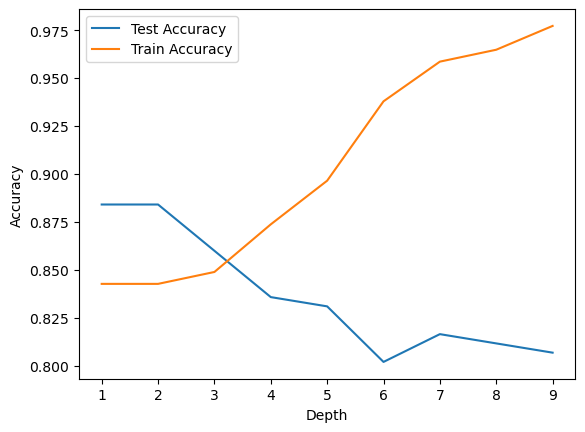

In [466]:
demo_df = pd.DataFrame(list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(demo_df['Depth'],demo_df['Test Accuracy'],label='Test Accuracy')
plt.plot(demo_df['Depth'],demo_df['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()    

The final test accuracy score of our decision tree model is 85%.

## Conclusion

|Model| Train Accuracy | Test Accuracy |
|--|--|--|
|Logistics regression| 85% | 88%|
|Decision Tree | 85%| 85%|